In [2]:
import geopandas as gpd
import pandas as pd

import duckdb


import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import contextily as cx



import numpy as np



In [3]:
## querry data via duckdb from parquets
# result is loaded to geodataframe

In [4]:
# Cell 1: Setup und Konfiguration


# Konfiguration
HASHTAG_FILTER = '%#missing-cw_mapillary-signs%'
PARQUET_PATHS = [
    '~/ohsome-planet/out-germany_cs_251201/contributions/history/way*-*-history-contribs.parquet',
    '~/ohsome-planet/out-germany_cs_251201/contributions/latest/way*-*-latest-contribs.parquet'
]

# Cell 2: Datenvorbereitung (einmalig, dauert 1min)
duckdb.sql("INSTALL spatial; LOAD spatial;")

duckdb.sql(f"""
CREATE OR REPLACE TABLE cycleway_base AS
SELECT
  ST_GeomFromWKB(geometry) AS geom,
  tags,
  tags_before,
  "user" AS usr,
  changeset,
  osm_type,
  osm_id,
  osm_version,
  valid_from,
  contrib_type,
  length,
  length_delta
FROM read_parquet({PARQUET_PATHS}, union_by_name=true)
WHERE COALESCE(changeset.tags.hashtags,'') ILIKE '{HASHTAG_FILTER}';
""")

print("✅ Datenvorbereitung abgeschlossen")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

✅ Datenvorbereitung abgeschlossen


In [5]:
rows = duckdb.sql("SELECT ST_AsText(geom) AS wkt, tags, changeset, usr FROM cycleway_base").fetchall()
gdf = gpd.GeoDataFrame.from_records(rows, columns=["wkt", "tags", "changeset", "usr"])
gdf

,wkt,tags,changeset,usr
0,"LINESTRING (10.1007807 52.8445143, 10.1006372 ...","{'sidewalk': 'left', 'surface': 'asphalt', 'hi...","{'id': 170571393, 'created_at': 2025-08-17 15:...","{'id': 3644159, 'name': 'bicyclett'}"
1,"LINESTRING (7.0063778 52.0763995, 7.0064358 52...","{'lanes:backward': '1', 'highway': 'tertiary',...","{'id': 171594127, 'created_at': 2025-09-07 16:...","{'id': 3644159, 'name': 'bicyclett'}"
2,"LINESTRING (10.1537437 51.7029116, 10.1535436 ...","{'lanes:backward': '1', 'surface': 'asphalt', ...","{'id': 174383963, 'created_at': 2025-11-08 16:...","{'id': 3644159, 'name': 'bicyclett'}"
3,"LINESTRING (6.6048115 51.5436366, 6.6047444 51...","{'surface': 'asphalt', 'cycleway:right:lane': ...","{'id': 173290337, 'created_at': 2025-10-14 18:...","{'id': 3644159, 'name': 'bicyclett'}"
4,"LINESTRING (6.8631898 51.8604337, 6.8631187 51...","{'name': 'Neumühlenallee', 'surface': 'asphalt...","{'id': 172198492, 'created_at': 2025-09-20 10:...","{'id': 3644159, 'name': 'bicyclett'}"
...,...,...,...,...
4808,"LINESTRING (10.6724112 50.5972919, 10.6723003 ...","{'highway': 'footway', 'surface': 'paving_ston...","{'id': 175100696, 'created_at': 2025-11-25 09:...","{'id': 3644159, 'name': 'bicyclett'}"
4809,"LINESTRING (11.1097973 50.3104896, 11.1098048 ...","{'surface': 'asphalt', 'traffic_sign': 'DE:240...","{'id': 175101637, 'created_at': 2025-11-25 09:...","{'id': 3644159, 'name': 'bicyclett'}"
4810,"LINESTRING (11.1099951 50.3101502, 11.109984 5...","{'surface': 'asphalt', 'traffic_sign': 'DE:240...","{'id': 175101637, 'created_at': 2025-11-25 09:...","{'id': 3644159, 'name': 'bicyclett'}"
4811,"LINESTRING (11.1105495 50.3112242, 11.1103233 ...","{'surface': 'asphalt', 'bicycle': 'designated'...","{'id': 175101637, 'created_at': 2025-11-25 09:...","{'id': 3644159, 'name': 'bicyclett'}"


## auf karte plotten


In [6]:
gdf

,wkt,tags,changeset,usr
0,"LINESTRING (10.1007807 52.8445143, 10.1006372 ...","{'sidewalk': 'left', 'surface': 'asphalt', 'hi...","{'id': 170571393, 'created_at': 2025-08-17 15:...","{'id': 3644159, 'name': 'bicyclett'}"
1,"LINESTRING (7.0063778 52.0763995, 7.0064358 52...","{'lanes:backward': '1', 'highway': 'tertiary',...","{'id': 171594127, 'created_at': 2025-09-07 16:...","{'id': 3644159, 'name': 'bicyclett'}"
2,"LINESTRING (10.1537437 51.7029116, 10.1535436 ...","{'lanes:backward': '1', 'surface': 'asphalt', ...","{'id': 174383963, 'created_at': 2025-11-08 16:...","{'id': 3644159, 'name': 'bicyclett'}"
3,"LINESTRING (6.6048115 51.5436366, 6.6047444 51...","{'surface': 'asphalt', 'cycleway:right:lane': ...","{'id': 173290337, 'created_at': 2025-10-14 18:...","{'id': 3644159, 'name': 'bicyclett'}"
4,"LINESTRING (6.8631898 51.8604337, 6.8631187 51...","{'name': 'Neumühlenallee', 'surface': 'asphalt...","{'id': 172198492, 'created_at': 2025-09-20 10:...","{'id': 3644159, 'name': 'bicyclett'}"
...,...,...,...,...
4808,"LINESTRING (10.6724112 50.5972919, 10.6723003 ...","{'highway': 'footway', 'surface': 'paving_ston...","{'id': 175100696, 'created_at': 2025-11-25 09:...","{'id': 3644159, 'name': 'bicyclett'}"
4809,"LINESTRING (11.1097973 50.3104896, 11.1098048 ...","{'surface': 'asphalt', 'traffic_sign': 'DE:240...","{'id': 175101637, 'created_at': 2025-11-25 09:...","{'id': 3644159, 'name': 'bicyclett'}"
4810,"LINESTRING (11.1099951 50.3101502, 11.109984 5...","{'surface': 'asphalt', 'traffic_sign': 'DE:240...","{'id': 175101637, 'created_at': 2025-11-25 09:...","{'id': 3644159, 'name': 'bicyclett'}"
4811,"LINESTRING (11.1105495 50.3112242, 11.1103233 ...","{'surface': 'asphalt', 'bicycle': 'designated'...","{'id': 175101637, 'created_at': 2025-11-25 09:...","{'id': 3644159, 'name': 'bicyclett'}"


/tmp/ipykernel_23379/180879745.py:3: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = gpd.GeoSeries.from_wkt(gdf["wkt"])


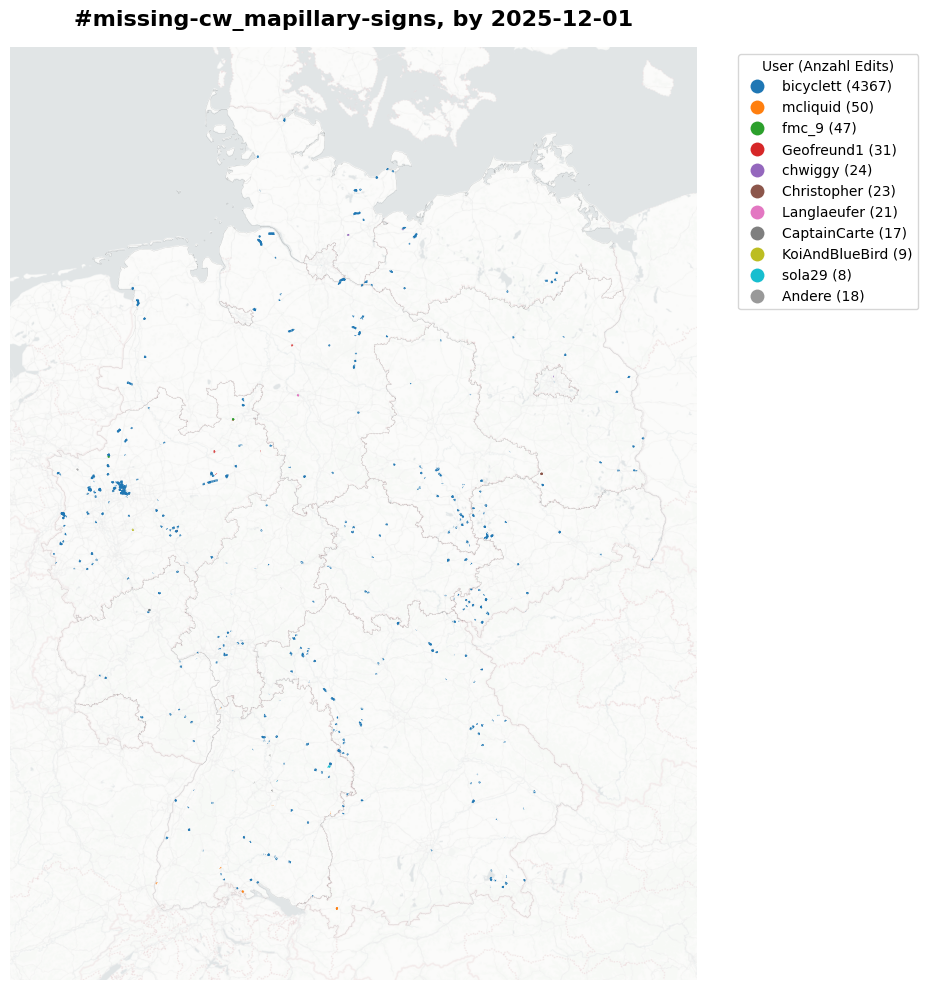

In [7]:

rows = duckdb.sql("SELECT ST_AsText(geom) AS wkt, tags, changeset, usr FROM cycleway_base").fetchall()
gdf = gpd.GeoDataFrame.from_records(rows, columns=["wkt", "tags", "changeset", "usr"])
gdf["geometry"] = gpd.GeoSeries.from_wkt(gdf["wkt"])
gdf = gdf.set_geometry("geometry", crs="EPSG:4326")


gdf["changeset_id"] = gdf["changeset"].apply(lambda u: u.get("id") if isinstance(u, dict) else None)
gdf["highway"] = gdf["tags"].apply(lambda u: u.get("highway") if isinstance(u, dict) else None)
gdf["hashtags"] = gdf["changeset"].apply(lambda u: u.get("tags").get("hashtags") if isinstance(u, dict) else None)
gdf["user_name"] = gdf["usr"].apply(lambda u: u.get("name") if isinstance(u, dict) else None)

gdf=gdf[gdf.highway.notnull()].copy()




# --- Top-10 + "Andere" wie zuvor ---
top10 = gdf["user_name"].value_counts().head(10)
gdf["user_plot"] = gdf["user_name"].where(gdf["user_name"].isin(top10.index), "Andere")
order = list(top10.index) + ["Andere"]
gdf["user_plot"] = pd.Categorical(gdf["user_plot"], categories=order, ordered=True)

# feste Farbzuordnung in genau dieser Reihenfolge (letzte Farbe neutral/grau für "Andere")
base_cmap = plt.cm.tab20
colors = base_cmap(np.linspace(0, 1, len(order)))
colors[-1] = (0.6, 0.6, 0.6, 1.0)  # "Andere" grau
cmap = ListedColormap(colors)



# Daten laden
shape = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/refs/heads/main/2_bundeslaender/1_sehr_hoch.geo.json")


# --- Reprojektion auf Web-Mercator für die Basemap ---
gdf3857 = gdf.to_crs(epsg=3857)
shape_3857 = shape.to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(14, 10))

# 🔹 Shape hinzufügen (kein Legendeneintrag)
shape_3857.boundary.plot(
    ax=ax,
    color="black",       # oder z. B. "black", "darkgrey"
    linewidth=0.03,
    label="_nolegend_" # verhindert Legendeneintrag
)



# 1) Vektordaten plotten (über der Basemap)
gdf3857.plot(
    column="user_plot",
    categorical=True,
    legend=True,
    cmap=cmap,
    ax=ax,
    legend_kwds={
        "bbox_to_anchor": (1.05, 1),
        "loc": "upper left",
        "title": "User (Anzahl Edits)"
    },
    zorder=2
)

# 2) Legendentexte umbenennen (Anzahl in Klammern), Reihenfolge bleibt unverändert
leg = ax.get_legend()
if leg:
    others = int((gdf["user_plot"] == "Andere").sum())
    rename_map = {u: f"{u} ({top10[u]})" for u in top10.index}
    rename_map["Andere"] = f"Andere ({others})"
    for t in leg.get_texts():
        lbl = t.get_text()
        if lbl in rename_map:
            t.set_text(rename_map[lbl])

# 3) Basemap hinzufügen (CartoDB Positron, leicht transparent)
#    Tipp: Für weniger Ablenkung: PositronNoLabels (ohne Beschriftungen)
cx.add_basemap(
    ax,
    source=cx.providers.CartoDB.PositronNoLabels,  # oder: CartoDB.Positron
    alpha=0.7,      # Transparenz
    attribution=False
)

# 🔹 Titel hinzufügen
ax.set_title(
    "#missing-cw_mapillary-signs, by 2025-12-01",
    fontsize=16,
    fontweight="bold",
    pad=15
)

# Achsen hübsch machen
ax.set_axis_off()
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()



In [8]:
gdf.to_file("cycleway_base.geojson", driver="GeoJSON")

In [9]:

def get_infrastructure_analysis():
    """Analyse nach Infrastruktur-Typen"""
    return duckdb.sql("""
    WITH base AS (
      SELECT
        tags, tags_before,
        length AS len_after_m,
        length - COALESCE(length_delta, 0) AS len_before_m,
        COALESCE(length_delta, 0) AS dlen_m
      FROM cycleway_base
      WHERE osm_type='way'
        AND tags['highway'] IS NOT NULL
        AND length IS NOT NULL
    ),
    flags_raw AS (
      SELECT
        len_after_m, len_before_m, dlen_m, tags, tags_before,

        -- AFTER (roh)
        ((tags['highway']='path')    AND (tags['bicycle']='designated'))  AS after_path_desig_raw,
        ( tags['highway']='cycleway')                                     AS after_cycleway_raw,
        ((tags['highway']='footway') AND (tags['bicycle']='yes'))         AS after_footway_bike_raw,
        ((tags['highway']='track')   AND (tags['bicycle']='designated'))  AS after_track_bike_raw,
        ( tags['bicycle_road']='yes')                                     AS after_bicycle_road_raw,

        -- Seitenanlagen NUR wenn highway != cycleway  (exklusive Logik)
        ( COALESCE(tags['highway'],'') <> 'cycleway'
          AND (
            tags['cycleway']='track' OR tags['cycleway:left']='track'
            OR tags['cycleway:right']='track' OR tags['cycleway:both']='track'
          )
        ) AS after_track_raw,

        ( COALESCE(tags['highway'],'') <> 'cycleway'
          AND (
            tags['cycleway']='lane' OR tags['cycleway:left']='lane'
            OR tags['cycleway:right']='lane' OR tags['cycleway:both']='lane'
          )
        ) AS after_lane_raw,

        -- BEFORE (roh)
        ((tags_before['highway']='path')    AND (tags_before['bicycle']='designated'))  AS before_path_desig_raw,
        ( tags_before['highway']='cycleway')                                           AS before_cycleway_raw,
        ((tags_before['highway']='footway') AND (tags_before['bicycle']='yes'))        AS before_footway_bike_raw,
        ((tags_before['highway']='track')   AND (tags_before['bicycle']='designated')) AS before_track_bike_raw,
        ( tags_before['bicycle_road']='yes')                                           AS before_bicycle_road_raw,

        -- Seitenanlagen NUR wenn highway != cycleway  (exklusive Logik)
        ( COALESCE(tags_before['highway'],'') <> 'cycleway'
          AND (
            tags_before['cycleway']='track' OR tags_before['cycleway:left']='track'
            OR tags_before['cycleway:right']='track' OR tags_before['cycleway:both']='track'
          )
        ) AS before_track_raw,

        ( COALESCE(tags_before['highway'],'') <> 'cycleway'
          AND (
            tags_before['cycleway']='lane' OR tags_before['cycleway:left']='lane'
            OR tags_before['cycleway:right']='lane' OR tags_before['cycleway:both']='lane'
          )
        ) AS before_lane_raw
      FROM base
    ),
    flags AS (
      SELECT
        len_after_m, len_before_m, dlen_m, tags, tags_before,
        COALESCE(after_path_desig_raw,FALSE)    AS after_path_desig,
        COALESCE(after_cycleway_raw,FALSE)      AS after_cycleway,
        COALESCE(after_footway_bike_raw,FALSE)  AS after_footway_bike,
        COALESCE(after_track_bike_raw,FALSE)    AS after_track_bike,
        COALESCE(after_bicycle_road_raw,FALSE)  AS after_bicycle_road,
        COALESCE(after_track_raw,FALSE)         AS after_track,
        COALESCE(after_lane_raw,FALSE)          AS after_lane,
        COALESCE(before_path_desig_raw,FALSE)   AS before_path_desig,
        COALESCE(before_cycleway_raw,FALSE)     AS before_cycleway,
        COALESCE(before_footway_bike_raw,FALSE) AS before_footway_bike,
        COALESCE(before_track_bike_raw,FALSE)   AS before_track_bike,
        COALESCE(before_bicycle_road_raw,FALSE) AS before_bicycle_road,
        COALESCE(before_track_raw,FALSE)        AS before_track,
        COALESCE(before_lane_raw,FALSE)         AS before_lane
      FROM flags_raw
    ),
    cat AS (
      SELECT
        -- path + designated
        (CASE WHEN after_path_desig AND NOT before_path_desig THEN len_after_m ELSE 0 END)
      + (CASE WHEN after_path_desig AND     before_path_desig THEN GREATEST(dlen_m,0) ELSE 0 END) AS add_path_desig,
        (CASE WHEN before_path_desig AND NOT after_path_desig THEN len_before_m ELSE 0 END)
      + (CASE WHEN before_path_desig AND     after_path_desig THEN -LEAST(dlen_m,0) ELSE 0 END)   AS del_path_desig,

        -- cycleway
        (CASE WHEN after_cycleway AND NOT before_cycleway THEN len_after_m ELSE 0 END)
      + (CASE WHEN after_cycleway AND     before_cycleway THEN GREATEST(dlen_m,0) ELSE 0 END)      AS add_cycleway,
        (CASE WHEN before_cycleway AND NOT after_cycleway THEN len_before_m ELSE 0 END)
      + (CASE WHEN before_cycleway AND     after_cycleway THEN -LEAST(dlen_m,0) ELSE 0 END)        AS del_cycleway,

        -- footway + bicycle=yes
        (CASE WHEN after_footway_bike AND NOT before_footway_bike THEN len_after_m ELSE 0 END)
      + (CASE WHEN after_footway_bike AND     before_footway_bike THEN GREATEST(dlen_m,0) ELSE 0 END) AS add_footway_bike,
        (CASE WHEN before_footway_bike AND NOT after_footway_bike THEN len_before_m ELSE 0 END)
      + (CASE WHEN before_footway_bike AND     after_footway_bike THEN -LEAST(dlen_m,0) ELSE 0 END)   AS del_footway_bike,

        -- highway=track & bicycle=designated
        (CASE WHEN after_track_bike AND NOT before_track_bike THEN len_after_m ELSE 0 END)
      + (CASE WHEN after_track_bike AND     before_track_bike THEN GREATEST(dlen_m,0) ELSE 0 END)     AS add_track_bike,
        (CASE WHEN before_track_bike AND NOT after_track_bike THEN len_before_m ELSE 0 END)
      + (CASE WHEN before_track_bike AND     after_track_bike THEN -LEAST(dlen_m,0) ELSE 0 END)       AS del_track_bike,

        -- bicycle_road
        (CASE WHEN after_bicycle_road AND NOT before_bicycle_road THEN len_after_m ELSE 0 END)
      + (CASE WHEN after_bicycle_road AND     before_bicycle_road THEN GREATEST(dlen_m,0) ELSE 0 END) AS add_bicycle_road,
        (CASE WHEN before_bicycle_road AND NOT after_bicycle_road THEN len_before_m ELSE 0 END)
      + (CASE WHEN before_bicycle_road AND     after_bicycle_road THEN -LEAST(dlen_m,0) ELSE 0 END)   AS del_bicycle_road,

        -- cycleway[:side]=track  (nur wenn highway != cycleway)
        (CASE WHEN after_track AND NOT before_track THEN len_after_m ELSE 0 END)
      + (CASE WHEN after_track AND     before_track THEN GREATEST(dlen_m,0) ELSE 0 END)               AS add_track,
        (CASE WHEN before_track AND NOT after_track THEN len_before_m ELSE 0 END)
      + (CASE WHEN before_track AND     after_track THEN -LEAST(dlen_m,0) ELSE 0 END)                 AS del_track,

        -- cycleway[:side]=lane   (nur wenn highway != cycleway)
        (CASE WHEN after_lane AND NOT before_lane THEN len_after_m ELSE 0 END)
      + (CASE WHEN after_lane AND     before_lane THEN GREATEST(dlen_m,0) ELSE 0 END)                 AS add_lane,
        (CASE WHEN before_lane AND NOT after_lane THEN len_before_m ELSE 0 END)
      + (CASE WHEN before_lane AND     after_lane THEN -LEAST(dlen_m,0) ELSE 0 END)                   AS del_lane
      FROM flags
    ),
    tot AS (
      SELECT
        SUM(add_path_desig)   AS add_path_desig,   SUM(del_path_desig)   AS del_path_desig,
        SUM(add_cycleway)     AS add_cycleway,     SUM(del_cycleway)     AS del_cycleway,
        SUM(add_footway_bike) AS add_footway_bike, SUM(del_footway_bike) AS del_footway_bike,
        SUM(add_track_bike)   AS add_track_bike,   SUM(del_track_bike)   AS del_track_bike,
        SUM(add_bicycle_road) AS add_bicycle_road, SUM(del_bicycle_road) AS del_bicycle_road,
        SUM(add_track)        AS add_track,        SUM(del_track)        AS del_track,
        SUM(add_lane)         AS add_lane,         SUM(del_lane)         AS del_lane
      FROM cat
    )
    -- Ausgabe in deiner Wunsch-Reihenfolge
    SELECT 'hw=path_bicycle=designated' AS category, ROUND(add_path_desig/1000.0, 1) AS km_added, ROUND(del_path_desig/1000.0, 1) AS km_deleted FROM tot
    UNION ALL
    SELECT 'hw=cycleway', ROUND(add_cycleway/1000.0, 1), ROUND(del_cycleway/1000.0, 1) FROM tot
    UNION ALL
    SELECT 'hw=footway_bicycle=yes', ROUND(add_footway_bike/1000.0, 1), ROUND(del_footway_bike/1000.0, 1) FROM tot
    UNION ALL
    SELECT 'hw=track_bicycle=designated', ROUND(add_track_bike/1000.0, 1), ROUND(del_track_bike/1000.0, 1) FROM tot
    UNION ALL
    SELECT 'bicycle_road', ROUND(add_bicycle_road/1000.0, 1), ROUND(del_bicycle_road/1000.0, 1) FROM tot
    UNION ALL
    SELECT 'cw=track', ROUND(add_track/1000.0, 1), ROUND(del_track/1000.0, 1) FROM tot
    UNION ALL
    SELECT 'cw=lane', ROUND(add_lane/1000.0, 1), ROUND(del_lane/1000.0, 1) FROM tot;
    """).fetchdf()

In [10]:
# Cell 5: Infrastruktur-Analyse  
print("🚴 Infrastruktur-Analyse...")
infra_stats = get_infrastructure_analysis()
print(infra_stats)

🚴 Infrastruktur-Analyse...
                      category  km_added  km_deleted
0   hw=path_bicycle=designated     303.6         5.7
1                  hw=cycleway       5.5        26.9
2       hw=footway_bicycle=yes      16.2        12.5
3  hw=track_bicycle=designated      18.8        10.1
4                 bicycle_road       2.4         0.0
5                     cw=track      52.1        30.5
6                      cw=lane      31.5         5.3


In [11]:
infra_stats.sum()

category      hw=path_bicycle=designatedhw=cyclewayhw=footwa...
km_added                                                  430.1
km_deleted                                                 91.0
dtype: object

In [12]:
# Funktion für Sankey-Diagramm Daten mit differenzierten Quellen
def get_infrastructure_analysis_sankey():
    """Gibt die Daten im Sankey-Format zurück (source, target, value)
    source ist differenziert: "Added" wenn neu, sonst die vorherige Kategorie
    """
    # Erweiterte SQL-Abfrage, die auch die vorherigen Kategorien analysiert
    result = duckdb.sql("""
    WITH base AS (
      SELECT
        tags, tags_before,
        length AS len_after_m,
        length - COALESCE(length_delta, 0) AS len_before_m,
        COALESCE(length_delta, 0) AS dlen_m
      FROM cycleway_base
      WHERE osm_type='way'
        AND tags['highway'] IS NOT NULL
        AND length IS NOT NULL
    ),
    flags_raw AS (
      SELECT
        len_after_m, len_before_m, dlen_m, tags, tags_before,

        -- AFTER (roh)
        ((tags['highway']='path')    AND (tags['bicycle']='designated'))  AS after_path_desig_raw,
        ( tags['highway']='cycleway')                                     AS after_cycleway_raw,
        ((tags['highway']='footway') AND (tags['bicycle']='yes'))         AS after_footway_bike_raw,
        ((tags['highway']='track')   AND (tags['bicycle']='designated'))  AS after_track_bike_raw,
        ( tags['bicycle_road']='yes')                                     AS after_bicycle_road_raw,
        ( COALESCE(tags['highway'],'') <> 'cycleway'
          AND (
            tags['cycleway']='track' OR tags['cycleway:left']='track'
            OR tags['cycleway:right']='track' OR tags['cycleway:both']='track'
          )
        ) AS after_track_raw,
        ( COALESCE(tags['highway'],'') <> 'cycleway'
          AND (
            tags['cycleway']='lane' OR tags['cycleway:left']='lane'
            OR tags['cycleway:right']='lane' OR tags['cycleway:both']='lane'
          )
        ) AS after_lane_raw,

        -- BEFORE (roh)
        ((tags_before['highway']='path')    AND (tags_before['bicycle']='designated'))  AS before_path_desig_raw,
        ( tags_before['highway']='cycleway')                                           AS before_cycleway_raw,
        ((tags_before['highway']='footway') AND (tags_before['bicycle']='yes'))        AS before_footway_bike_raw,
        ((tags_before['highway']='track')   AND (tags_before['bicycle']='designated')) AS before_track_bike_raw,
        ( tags_before['bicycle_road']='yes')                                           AS before_bicycle_road_raw,
        ( COALESCE(tags_before['highway'],'') <> 'cycleway'
          AND (
            tags_before['cycleway']='track' OR tags_before['cycleway:left']='track'
            OR tags_before['cycleway:right']='track' OR tags_before['cycleway:both']='track'
          )
        ) AS before_track_raw,
        ( COALESCE(tags_before['highway'],'') <> 'cycleway'
          AND (
            tags_before['cycleway']='lane' OR tags_before['cycleway:left']='lane'
            OR tags_before['cycleway:right']='lane' OR tags_before['cycleway:both']='lane'
          )
        ) AS before_lane_raw,
        
        -- Vorherige Kategorien (für source)
        tags_before['highway'] AS before_highway,
        tags_before['bicycle'] AS before_bicycle,
        tags_before['bicycle_road'] AS before_bicycle_road,
        tags_before['cycleway'] AS before_cycleway,
        tags_before['cycleway:left'] AS before_cycleway_left,
        tags_before['cycleway:right'] AS before_cycleway_right,
        tags_before['cycleway:both'] AS before_cycleway_both
      FROM base
    ),
    flags AS (
      SELECT
        len_after_m, len_before_m, dlen_m, tags, tags_before,
        COALESCE(after_path_desig_raw,FALSE)    AS after_path_desig,
        COALESCE(after_cycleway_raw,FALSE)      AS after_cycleway,
        COALESCE(after_footway_bike_raw,FALSE)  AS after_footway_bike,
        COALESCE(after_track_bike_raw,FALSE)    AS after_track_bike,
        COALESCE(after_bicycle_road_raw,FALSE)  AS after_bicycle_road,
        COALESCE(after_track_raw,FALSE)         AS after_track,
        COALESCE(after_lane_raw,FALSE)          AS after_lane,
        COALESCE(before_path_desig_raw,FALSE)   AS before_path_desig,
        COALESCE(before_cycleway_raw,FALSE)     AS before_cycleway,
        COALESCE(before_footway_bike_raw,FALSE) AS before_footway_bike,
        COALESCE(before_track_bike_raw,FALSE)   AS before_track_bike,
        COALESCE(before_bicycle_road_raw,FALSE) AS before_bicycle_road,
        COALESCE(before_track_raw,FALSE)        AS before_track,
        COALESCE(before_lane_raw,FALSE)         AS before_lane,
        before_highway, before_bicycle, before_bicycle_road,
        before_cycleway, before_cycleway_left, before_cycleway_right, before_cycleway_both
      FROM flags_raw
    ),
    with_source AS (
      SELECT
        -- Bestimme aktuelle Kategorie (target)
        CASE 
          WHEN after_path_desig THEN 'hw=path_bicycle=designated'
          WHEN after_cycleway THEN 'hw=cycleway'
          WHEN after_footway_bike THEN 'hw=footway_bicycle=yes'
          WHEN after_track_bike THEN 'hw=track_bicycle=designated'
          WHEN after_bicycle_road THEN 'bicycle_road'
          WHEN after_track THEN 'cw=track'
          WHEN after_lane THEN 'cw=lane'
          ELSE NULL
        END AS target_category,
        
        -- Bestimme vorherige Kategorie (source)
        CASE 
          WHEN before_path_desig THEN 'hw=path_bicycle=designated'
          WHEN before_cycleway THEN 'hw=cycleway'
          WHEN before_footway_bike THEN 'hw=footway_bicycle=yes'
          WHEN before_track_bike THEN 'hw=track_bicycle=designated'
          WHEN before_bicycle_road THEN 'bicycle_road'
          WHEN before_track THEN 'cw=track'
          WHEN before_lane THEN 'cw=lane'
          WHEN before_highway IS NOT NULL THEN 'hw=' || before_highway || '_other'
          ELSE 'Added'
        END AS source_category,
        
        -- Länge für added (nur wenn target existiert und source != target)
        CASE 
          WHEN after_path_desig AND NOT before_path_desig THEN len_after_m
          WHEN after_path_desig AND before_path_desig AND dlen_m > 0 THEN dlen_m
          WHEN after_cycleway AND NOT before_cycleway THEN len_after_m
          WHEN after_cycleway AND before_cycleway AND dlen_m > 0 THEN dlen_m
          WHEN after_footway_bike AND NOT before_footway_bike THEN len_after_m
          WHEN after_footway_bike AND before_footway_bike AND dlen_m > 0 THEN dlen_m
          WHEN after_track_bike AND NOT before_track_bike THEN len_after_m
          WHEN after_track_bike AND before_track_bike AND dlen_m > 0 THEN dlen_m
          WHEN after_bicycle_road AND NOT before_bicycle_road THEN len_after_m
          WHEN after_bicycle_road AND before_bicycle_road AND dlen_m > 0 THEN dlen_m
          WHEN after_track AND NOT before_track THEN len_after_m
          WHEN after_track AND before_track AND dlen_m > 0 THEN dlen_m
          WHEN after_lane AND NOT before_lane THEN len_after_m
          WHEN after_lane AND before_lane AND dlen_m > 0 THEN dlen_m
          ELSE 0
        END AS added_length
      FROM flags
      WHERE (
        after_path_desig OR after_cycleway OR after_footway_bike OR after_track_bike 
        OR after_bicycle_road OR after_track OR after_lane
      )
    )
    SELECT 
      source_category AS source,
      target_category AS target,
      ROUND(SUM(added_length)/1000.0, 1) AS value
    FROM with_source
    WHERE target_category IS NOT NULL 
      AND added_length > 0
      AND source_category != target_category
    GROUP BY source_category, target_category
    ORDER BY value DESC;
    """).fetchdf()
    
    return result

# Erstelle Sankey-Daten
sankey_df = get_infrastructure_analysis_sankey()
print("Sankey-Daten mit differenzierten Quellen:")
print(sankey_df)


Sankey-Daten mit differenzierten Quellen:
                         source                       target  value
0                         Added   hw=path_bicycle=designated  140.5
1                 hw=path_other   hw=path_bicycle=designated   66.4
2                   hw=cycleway   hw=path_bicycle=designated   25.0
3                hw=track_other   hw=path_bicycle=designated   24.4
4              hw=footway_other   hw=path_bicycle=designated   20.2
5             hw=tertiary_other                     cw=track   18.9
6                hw=track_other  hw=track_bicycle=designated   17.5
7            hw=secondary_other                     cw=track   14.7
8        hw=footway_bicycle=yes   hw=path_bicycle=designated   10.9
9            hw=secondary_other                      cw=lane   10.3
10                        Added       hw=footway_bicycle=yes    8.3
11            hw=tertiary_other                      cw=lane    7.2
12  hw=track_bicycle=designated   hw=path_bicycle=designated    7.2
13    

In [13]:
# Sankey-Diagramm mit plotly erstellen (mit differenzierten Quellen)
import plotly.graph_objects as go
import numpy as np

# Erstelle Sankey-Daten
sankey_df = get_infrastructure_analysis_sankey()

# Filtere nur positive Werte
sankey_df = sankey_df[sankey_df['value'] > 0].copy()

# Hole alle eindeutigen Sources und Targets
sources = sorted(sankey_df['source'].unique())
targets = sorted(sankey_df['target'].unique())

# Berechne Gesamtwerte für Farbcodierung und Sortierung
source_totals = sankey_df.groupby('source')['value'].sum().to_dict()
target_totals = sankey_df.groupby('target')['value'].sum().to_dict()

# Sortiere nach Gesamtwert für bessere Positionierung
sources = sorted(sources, key=lambda x: source_totals.get(x, 0), reverse=True)
targets = sorted(targets, key=lambda x: target_totals.get(x, 0), reverse=True)

# Erstelle Liste aller Knoten: Sources links, Targets rechts (auch wenn sie überlappen)
# Jeder Knoten erscheint zweimal wenn er sowohl Source als auch Target ist
all_nodes = sources + targets
# Erstelle Indizes: Sources bekommen Indizes 0..len(sources)-1, Targets bekommen len(sources)..len(sources)+len(targets)-1
source_indices_map = {source: idx for idx, source in enumerate(sources)}
target_indices_map = {target: len(sources) + idx for idx, target in enumerate(targets)}

# Erstelle source, target und value Listen für plotly
source_indices = []
target_indices = []
values = []
link_colors = []

# Farben definieren
color_added = 'rgba(31, 119, 180, 0.6)'
color_other = 'rgba(44, 160, 44, 0.6)'

for _, row in sankey_df.iterrows():
    source = row['source']
    target = row['target']
    value = row['value']
    
    # Verwende separate Indizes für Sources (links) und Targets (rechts)
    source_indices.append(source_indices_map[source])
    target_indices.append(target_indices_map[target])
    values.append(value)
    
    # Farbe basierend auf Source
    if source == 'Added':
        link_colors.append(color_added)
    else:
        link_colors.append(color_other)

# Erstelle Knoten-Farben und Labels
node_colors = []
node_labels = []
node_x = []  # X-Positionen: 0 für Sources, 1 für Targets
node_y = []  # Y-Positionen: proportional zu Werten

# Berechne Y-Positionen für Sources (proportional zu Werten)
source_total = sum(source_totals.values())
y_current = 0
source_y_positions = {}
for source in sources:
    total = source_totals.get(source, 0)
    if total > 0:
        height = total / source_total if source_total > 0 else 0
        source_y_positions[source] = y_current + height / 2
        y_current += height

# Berechne Y-Positionen für Targets (proportional zu Werten)
target_total = sum(target_totals.values())
y_current = 0
target_y_positions = {}
for target in targets:
    total = target_totals.get(target, 0)
    if total > 0:
        height = total / target_total if target_total > 0 else 0
        target_y_positions[target] = y_current + height / 2
        y_current += height

# Erstelle Knoten-Arrays: Zuerst alle Sources, dann alle Targets
# Sources (links)
for source in sources:
    node_x.append(0.05)  # Links für Sources, mit etwas Abstand zum Rand
    node_y.append(source_y_positions.get(source, 0))
    if source == 'Added':
        node_colors.append('#1f77b4')
    else:
        node_colors.append('#2ca02c')
    # Label mit Gesamtwert - kürzere Formatierung
    total = source_totals.get(source, 0)
    label = source.replace('hw=', '').replace('_other', ' (other)').replace('_', ' ')
    if len(label) > 30:
        label = label[:27] + '...'
    node_labels.append(f'{label}<br><b>{total:.1f} km</b>')

# Targets (rechts)
for target in targets:
    node_x.append(0.95)  # Rechts für Targets, mit etwas Abstand zum Rand
    node_y.append(target_y_positions.get(target, 0))
    node_colors.append('#ff7f0e')
    total = target_totals.get(target, 0)
    label = target.replace('hw=', '').replace('bicycle=designated', 'bike').replace('bicycle=yes', 'bike').replace('_', ' ')
    if len(label) > 30:
        label = label[:27] + '...'
    node_labels.append(f'{label}<br><b>{total:.1f} km</b>')

# Erstelle das Sankey-Diagramm
fig = go.Figure(data=[go.Sankey(
    arrangement='perpendicular',  # Bessere Anordnung der Links
    node=dict(
        pad=30,  # Mehr Abstand zwischen Knoten
        thickness=25,  # Dickere Knoten für bessere Lesbarkeit
        line=dict(color="black", width=1),
        label=node_labels,
        color=node_colors,
        x=node_x,
        y=node_y
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors,
        hovertemplate='<b>%{source.label}</b> → <b>%{target.label}</b><br>Wert: <b>%{value:.1f} km</b><extra></extra>'
    )
)])

fig.update_layout(
    title_text="Infrastruktur-Änderungen: Sources → Targets",
    font_size=11,
    height=1500,
    width=1600,  # Etwas breiter für bessere Darstellung
    margin=dict(l=50, r=50, t=80, b=50)  # Mehr Rand für Labels
)

fig.show()


In [73]:
# Sankey-Diagramm mit plotly erstellen (mit differenzierten Quellen)
import plotly.graph_objects as go
import numpy as np

# Erstelle Sankey-Daten
sankey_df = get_infrastructure_analysis_sankey()

# Filtere nur positive Werte
sankey_df = sankey_df[sankey_df['value'] > 0].copy()

# Hole alle eindeutigen Sources und Targets
sources = sorted(sankey_df['source'].unique())
targets = sorted(sankey_df['target'].unique())

# Berechne Gesamtwerte für Farbcodierung und Sortierung
source_totals = sankey_df.groupby('source')['value'].sum().to_dict()
target_totals = sankey_df.groupby('target')['value'].sum().to_dict()

# Sortiere nach Gesamtwert für bessere Positionierung
sources = sorted(sources, key=lambda x: source_totals.get(x, 0), reverse=True)
targets = sorted(targets, key=lambda x: target_totals.get(x, 0), reverse=True)

# Erstelle Liste aller Knoten: Sources links, Targets rechts (auch wenn sie überlappen)
# Jeder Knoten erscheint zweimal wenn er sowohl Source als auch Target ist
all_nodes = sources + targets
# Erstelle Indizes: Sources bekommen Indizes 0..len(sources)-1, Targets bekommen len(sources)..len(sources)+len(targets)-1
source_indices_map = {source: idx for idx, source in enumerate(sources)}
target_indices_map = {target: len(sources) + idx for idx, target in enumerate(targets)}

# Erstelle source, target und value Listen für plotly
source_indices = []
target_indices = []
values = []
link_colors = []

# Farben definieren
color_added = 'rgba(114, 56, 150, 0.5)'
color_other = 'rgba(67, 75, 163, 0.5)'

for _, row in sankey_df.iterrows():
    source = row['source']
    target = row['target']
    value = row['value']
    
    # Verwende separate Indizes für Sources (links) und Targets (rechts)
    source_indices.append(source_indices_map[source])
    target_indices.append(target_indices_map[target])
    values.append(value)
    
    # Farbe basierend auf Source
    if source == 'Added':
        link_colors.append(color_added)
    else:
        link_colors.append(color_other)

# Erstelle Knoten-Farben und Labels
node_colors = []
node_labels = []
node_x = []  # X-Positionen: 0 für Sources, 1 für Targets
node_y = []  # Y-Positionen: proportional zu Werten

# Berechne Y-Positionen für Sources (proportional zu Werten)
source_total = sum(source_totals.values())
y_current = 0
source_y_positions = {}
for source in sources:
    total = source_totals.get(source, 0)
    if total > 0:
        height = total / source_total if source_total > 0 else 0
        source_y_positions[source] = y_current + height / 2
        y_current += height

# Berechne Y-Positionen für Targets (proportional zu Werten)
target_total = sum(target_totals.values())
y_current = 0
target_y_positions = {}
for target in targets:
    total = target_totals.get(target, 0)
    if total > 0:
        height = total / target_total if target_total > 0 else 0
        target_y_positions[target] = y_current + height / 2 
        y_current += height


# # Berechne Y-Positionen für Targets (proportional zu Werten) + variable Gaps
# target_total = sum(target_totals.values())

# # Parameter zum Tuning
# min_height = 0.012      # Mindest-"Höhe" pro Node (macht kleine Nodes lesbarer)
# gap_base   = 0.002      # Grundabstand zwischen Nodes
# gap_scale  = 0.020      # wie stark kleine Nodes extra Abstand bekommen

# # 1) Roh-Heights
# heights = np.array([target_totals.get(t, 0) / target_total for t in targets], dtype=float)

# # 2) Mindesthöhe erzwingen (optional, aber sehr hilfreich bei vielen kleinen Nodes)
# heights = np.maximum(heights, min_height)

# # 3) Variable Gaps: kleine Nodes bekommen mehr Abstand
# #    (wenn height klein => (h_max - h) groß => gap groß)
# h_max = heights.max() if len(heights) else 0
# gaps = gap_base + gap_scale * (h_max - heights)

# # 4) Normalisieren: Sum(heights) + Sum(gaps) muss in [0..1] passen
# total_span = heights.sum() + gaps.sum()
# heights = heights / total_span
# gaps    = gaps    / total_span

# # 5) Midpoints berechnen
# target_y_positions = {}
# y_current = 0.0
# for t, h, g in zip(targets, heights, gaps):
#     target_y_positions[t] = y_current + h / 2
#     y_current += h + g

###############################
import numpy as np

def compute_y_positions(items, totals, min_height=0.012, gap_base=0.002, gap_scale=0.020):
    total_sum = sum(totals.values())
    if total_sum == 0:
        return {item: 0.5 for item in items}

    # 1) Roh-Heights
    heights = np.array([totals.get(i, 0) / total_sum for i in items], dtype=float)

    # 2) Mindesthöhe erzwingen
    heights = np.maximum(heights, min_height)

    # 3) Variable Gaps (kleine Nodes → größerer Abstand)
    h_max = heights.max()
    gaps = gap_base + gap_scale * (h_max - heights)

    # 4) Normalisieren
    total_span = heights.sum() + gaps.sum()
    heights /= total_span
    gaps    /= total_span

    # 5) Midpoints berechnen
    y_positions = {}
    y_current = 0.0
    for item, h, g in zip(items, heights, gaps):
        y_positions[item] = y_current + h / 2
        y_current += h + g

    return y_positions

source_y_positions = compute_y_positions(
    sources,
    source_totals,
    min_height=0.024,   # Sources meist weniger → etwas größer
    gap_base=0.02,
    gap_scale=0.020
)

target_y_positions = compute_y_positions(
    targets,
    target_totals,
    min_height=0.012,
    gap_base=0.002,
    gap_scale=0.020
)



# Erstelle Knoten-Arrays: Zuerst alle Sources, dann alle Targets
# Sources (links)
for source in sources:
    node_x.append(0.05)  # Links für Sources, mit etwas Abstand zum Rand
    node_y.append(source_y_positions.get(source, 0))
    if source == 'Added':
        node_colors.append("#843b77")
    else:
        node_colors.append("#2c36a0")
    # Label mit Gesamtwert - kürzere Formatierung
    total = source_totals.get(source, 0)
    label = source.replace('_other', ' (other)').replace('bicycle=designated', '| bicy=dsgn').replace('bicycle=yes', '| bicy=yes').replace('_', ' ')
    if len(label) > 30:
        label = label[:27] + '...'
    node_labels.append(f'{label}<br><b>{total:.1f} km</b>')

# Targets (rechts)
for target in targets:
    node_x.append(0.95)  # Rechts für Targets, mit etwas Abstand zum Rand
    node_y.append(target_y_positions.get(target, 0))
    node_colors.append("#4d9663")
    total = target_totals.get(target, 0)
    label = target.replace('bicycle=designated', '| bicy=dsgn').replace('bicycle=yes', '| bicy=yes').replace('_', ' ')
    if len(label) > 30:
        label = label[:27] + '...'
    node_labels.append(f'{label} <b>{total:.1f} km</b>')

# Erstelle das Sankey-Diagramm
fig = go.Figure(data=[go.Sankey(
    arrangement='perpendicular',  # Bessere Anordnung der Links
    node=dict(
        pad=25,  # Mehr Abstand zwischen Knoten
        thickness=20,  # Dickere Knoten für bessere Lesbarkeit
        line=dict(color="black", width=1),
        label=node_labels,
        color=node_colors,
        x=node_x,
        y=node_y
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors,
        hovertemplate='<b>%{source.label}</b> → <b>%{target.label}</b><br>Wert: <b>%{value:.1f} km</b><extra></extra>'
    )
)])

print (node_y)

fig.update_layout(
    #title_text="<b>#missing-cw_mapillary-signs</b>, by 2025-12-01 <br><br> Infrastruktur-Änderungen: Sources → Targets <br>",
    title_text=(
    "<b>#missing-cw_mapillary-signs</b>, Stand: 2025-12-01<br><br>"
    "Infrastruktur-Änderungen: Sources → Targets<br><br>"
    "<span style='font-size:11px;'>"
    "<b>Lesart:</b> Die Targets (rechts) zeigen Radinfrastruktur, "
    "die es zuvor in dieser Form noch nicht gab. <br>"
    "Verbindungen aus <i>Added</i> stehen für neu hinzugefügte Wege. "
    "Alle anderen Sources repräsentieren bestehende Wege, <br>"
    "die durch Tag-Anpassungen zur Radinfrasturkur ergänzt oder präzisiert wurden.<br>"
    "<br>"
    "<b>Hinweis:</b> „(other)“ auf der linken Seite bedeutet, "
    "dass zuvor keine eindeutig erkennbare Radinfrastruktur "
    "getaggt war – <br>häufig fehlten entweder "
    "<span style='font-family:monospace;font-size:11px;'>bicycle=yes/designated</span>"
    " auf separaten Wegen oder ein "
    "<span style='font-family:monospace;font-size:11px;'>cycleway</span>"
    "-Tag.</span>"

) ,
    font_size=11,
    height=1200,
    width=800,  # Etwas breiter für bessere Darstellung
    margin=dict(l=20, r=50, t=260, b=50),  # Mehr Rand für Labels
        title=dict(
        y=0.95,
        yanchor="top"
    ),
)

fig.show()


[np.float64(0.11478803646320951), np.float64(0.2920283977264665), np.float64(0.3878250324536018), np.float64(0.4535654033109074), np.float64(0.5078798141192409), np.float64(0.5616922107527609), np.float64(0.614999657456059), np.float64(0.6576767338260251), np.float64(0.690052244468385), np.float64(0.7219251537848498), np.float64(0.7536537648514875), np.float64(0.7853823759181252), np.float64(0.8171109869847629), np.float64(0.8488395980514006), np.float64(0.8805682091180383), np.float64(0.9122968201846761), np.float64(0.9440254312513138), np.float64(0.9757540423179515), np.float64(0.32117402254204275), np.float64(0.6999636018481531), np.float64(0.8003223983177825), np.float64(0.8658586055344042), np.float64(0.9172070386575379), np.float64(0.9544148189175669), np.float64(0.9800924624777071)]


In [74]:
fig.write_html("sankey.html", include_plotlyjs="cdn")

In [23]:
###### GEoemetreiesn

In [47]:
# Funktion zum Extrahieren der Geometrien mit Kategorien für GeoDataFrame
def get_infrastructure_geometries():
    """Gibt ein GeoDataFrame mit Geometrien und Kategorien zurück"""
    import geopandas as gpd
    
    # SQL-Abfrage, die Geometrien mit Kategorien extrahiert
    result = duckdb.sql("""
    WITH base AS (
      SELECT
        geom,
        tags, tags_before,
        length AS len_after_m,
        length - COALESCE(length_delta, 0) AS len_before_m,
        COALESCE(length_delta, 0) AS dlen_m,
        osm_id,
        osm_version,
        valid_from
      FROM cycleway_base
      WHERE osm_type='way'
        AND tags['highway'] IS NOT NULL
        AND length IS NOT NULL
    ),
    flags_raw AS (
      SELECT
        geom,
        len_after_m, len_before_m, dlen_m, tags, tags_before,
        osm_id, osm_version, valid_from,

        -- AFTER (roh)
        ((tags['highway']='path')    AND (tags['bicycle']='designated'))  AS after_path_desig_raw,
        ( tags['highway']='cycleway')                                     AS after_cycleway_raw,
        ((tags['highway']='footway') AND (tags['bicycle']='yes'))         AS after_footway_bike_raw,
        ((tags['highway']='track')   AND (tags['bicycle']='designated'))  AS after_track_bike_raw,
        ( tags['bicycle_road']='yes')                                     AS after_bicycle_road_raw,
        ( COALESCE(tags['highway'],'') <> 'cycleway'
          AND (
            tags['cycleway']='track' OR tags['cycleway:left']='track'
            OR tags['cycleway:right']='track' OR tags['cycleway:both']='track'
          )
        ) AS after_track_raw,
        ( COALESCE(tags['highway'],'') <> 'cycleway'
          AND (
            tags['cycleway']='lane' OR tags['cycleway:left']='lane'
            OR tags['cycleway:right']='lane' OR tags['cycleway:both']='lane'
          )
        ) AS after_lane_raw,

        -- BEFORE (roh)
        ((tags_before['highway']='path')    AND (tags_before['bicycle']='designated'))  AS before_path_desig_raw,
        ( tags_before['highway']='cycleway')                                           AS before_cycleway_raw,
        ((tags_before['highway']='footway') AND (tags_before['bicycle']='yes'))        AS before_footway_bike_raw,
        ((tags_before['highway']='track')   AND (tags_before['bicycle']='designated')) AS before_track_bike_raw,
        ( tags_before['bicycle_road']='yes')                                           AS before_bicycle_road_raw,
        ( COALESCE(tags_before['highway'],'') <> 'cycleway'
          AND (
            tags_before['cycleway']='track' OR tags_before['cycleway:left']='track'
            OR tags_before['cycleway:right']='track' OR tags_before['cycleway:both']='track'
          )
        ) AS before_track_raw,
        ( COALESCE(tags_before['highway'],'') <> 'cycleway'
          AND (
            tags_before['cycleway']='lane' OR tags_before['cycleway:left']='lane'
            OR tags_before['cycleway:right']='lane' OR tags_before['cycleway:both']='lane'
          )
        ) AS before_lane_raw,
        
        -- Vorherige Kategorien (für source)
        tags_before['highway'] AS before_highway,
        tags_before['bicycle'] AS before_bicycle,
        tags_before['bicycle_road'] AS before_bicycle_road,
        tags_before['cycleway'] AS before_cycleway,
        tags_before['cycleway:left'] AS before_cycleway_left,
        tags_before['cycleway:right'] AS before_cycleway_right,
        tags_before['cycleway:both'] AS before_cycleway_both
      FROM base
    ),
    flags AS (
      SELECT
        geom,
        len_after_m, len_before_m, dlen_m, tags, tags_before,
        osm_id, osm_version, valid_from,
        COALESCE(after_path_desig_raw,FALSE)    AS after_path_desig,
        COALESCE(after_cycleway_raw,FALSE)      AS after_cycleway,
        COALESCE(after_footway_bike_raw,FALSE)  AS after_footway_bike,
        COALESCE(after_track_bike_raw,FALSE)    AS after_track_bike,
        COALESCE(after_bicycle_road_raw,FALSE)  AS after_bicycle_road,
        COALESCE(after_track_raw,FALSE)         AS after_track,
        COALESCE(after_lane_raw,FALSE)          AS after_lane,
        COALESCE(before_path_desig_raw,FALSE)   AS before_path_desig,
        COALESCE(before_cycleway_raw,FALSE)     AS before_cycleway,
        COALESCE(before_footway_bike_raw,FALSE) AS before_footway_bike,
        COALESCE(before_track_bike_raw,FALSE)   AS before_track_bike,
        COALESCE(before_bicycle_road_raw,FALSE) AS before_bicycle_road,
        COALESCE(before_track_raw,FALSE)        AS before_track,
        COALESCE(before_lane_raw,FALSE)         AS before_lane,
        before_highway, before_bicycle, before_bicycle_road,
        before_cycleway, before_cycleway_left, before_cycleway_right, before_cycleway_both
      FROM flags_raw
    ),
    with_categories AS (
      SELECT
        geom,
        osm_id,
        osm_version,
        valid_from,
        len_after_m / 1000.0 AS length_km,
        
        -- Bestimme aktuelle Kategorie (target)
        CASE 
          WHEN after_path_desig THEN 'hw=path_bicycle=designated'
          WHEN after_cycleway THEN 'hw=cycleway'
          WHEN after_footway_bike THEN 'hw=footway_bicycle=yes'
          WHEN after_track_bike THEN 'hw=track_bicycle=designated'
          WHEN after_bicycle_road THEN 'bicycle_road'
          WHEN after_track THEN 'cw=track'
          WHEN after_lane THEN 'cw=lane'
          ELSE NULL
        END AS target_category,
        
        -- Bestimme vorherige Kategorie (source)
        CASE 
          WHEN before_path_desig THEN 'hw=path_bicycle=designated'
          WHEN before_cycleway THEN 'hw=cycleway'
          WHEN before_footway_bike THEN 'hw=footway_bicycle=yes'
          WHEN before_track_bike THEN 'hw=track_bicycle=designated'
          WHEN before_bicycle_road THEN 'bicycle_road'
          WHEN before_track THEN 'cw=track'
          WHEN before_lane THEN 'cw=lane'
          WHEN before_highway IS NOT NULL THEN 'hw=' || before_highway || '_other'
          ELSE 'Added'
        END AS source_category
      FROM flags
      WHERE (
        after_path_desig OR after_cycleway OR after_footway_bike OR after_track_bike 
        OR after_bicycle_road OR after_track OR after_lane
      )
    )
    SELECT 
      ST_AsWKB(geom) AS geometry,
      source_category AS source,
      target_category AS target,
      length_km,
      osm_id,
      osm_version,
      valid_from
    FROM with_categories
    WHERE target_category IS NOT NULL;
    """).fetchall()
    
    # Konvertiere zu GeoDataFrame
    columns = ['geometry', 'source', 'target', 'length_km', 'osm_id', 'osm_version', 'valid_from']
    gdf = gpd.GeoDataFrame.from_records(result, columns=columns)
    gdf['geometry'] = gpd.GeoSeries.from_wkb(gdf['geometry'])
    gdf = gdf.set_geometry('geometry', crs='EPSG:4326')
    
    return gdf

# Extrahiere Geometrien mit Kategorien
print("🔄 Extrahiere Geometrien mit Kategorien...")
gdf_categories = get_infrastructure_geometries()
print(f"✅ {len(gdf_categories)} Geometrien extrahiert")
print(f"\nSpalten: {list(gdf_categories.columns)}")
print(f"\nErste Zeilen:")
print(gdf_categories.head())
print(f"\nKategorien-Übersicht:")
print(f"Sources: {gdf_categories['source'].value_counts()}")
print(f"\nTargets: {gdf_categories['target'].value_counts()}")


🔄 Extrahiere Geometrien mit Kategorien...
✅ 2468 Geometrien extrahiert

Spalten: ['geometry', 'source', 'target', 'length_km', 'osm_id', 'osm_version', 'valid_from']

Erste Zeilen:
                                            geometry                source  \
0  LINESTRING (7.00638 52.0764, 7.00644 52.07641,...     hw=tertiary_other   
1  LINESTRING (10.15374 51.70291, 10.15354 51.702...               cw=lane   
2  LINESTRING (6.60481 51.54364, 6.60474 51.54363...     hw=tertiary_other   
3  LINESTRING (6.60027 51.5484, 6.59998 51.54827,...     hw=tertiary_other   
4     LINESTRING (8.61471 50.22078, 8.6147 50.22072)  hw=residential_other   

     target  length_km    osm_id  osm_version                valid_from  
0  cw=track   0.119858   5054575           26 2025-09-07 18:30:27+02:00  
1   cw=lane   0.228573   5098485           29 2025-11-08 17:19:15+01:00  
2   cw=lane   0.364879   5121393           19 2025-10-14 20:59:03+02:00  
3  cw=track   0.639190  21105527           19 2025-10-

In [48]:
# Beispiel: GeoDataFrame speichern oder visualisieren
# gdf_categories.to_file("infrastructure_categories.geojson", driver="GeoJSON")

# Beispiel: Nach Kategorie filtern
# gdf_path_desig = gdf_categories[gdf_categories['target'] == 'hw=path_bicycle=designated']
# gdf_cw_track = gdf_categories[gdf_categories['target'] == 'cw=track']

# Beispiel: Visualisierung mit matplotlib/geopandas
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(12, 10))
# gdf_categories.plot(column='target', ax=ax, legend=True, cmap='tab10')
# plt.title('Infrastruktur-Kategorien auf Karte')
# plt.show()

print("💡 Tipp: Das GeoDataFrame 'gdf_categories' ist jetzt verfügbar für:")
print("   - Speichern als GeoJSON: gdf_categories.to_file('...geojson', driver='GeoJSON')")
print("   - Filtern nach Kategorie: gdf_categories[gdf_categories['target'] == '...']")
print("   - Visualisierung auf Karte: gdf_categories.plot(column='target')")


💡 Tipp: Das GeoDataFrame 'gdf_categories' ist jetzt verfügbar für:
   - Speichern als GeoJSON: gdf_categories.to_file('...geojson', driver='GeoJSON')
   - Filtern nach Kategorie: gdf_categories[gdf_categories['target'] == '...']
   - Visualisierung auf Karte: gdf_categories.plot(column='target')


<Axes: >

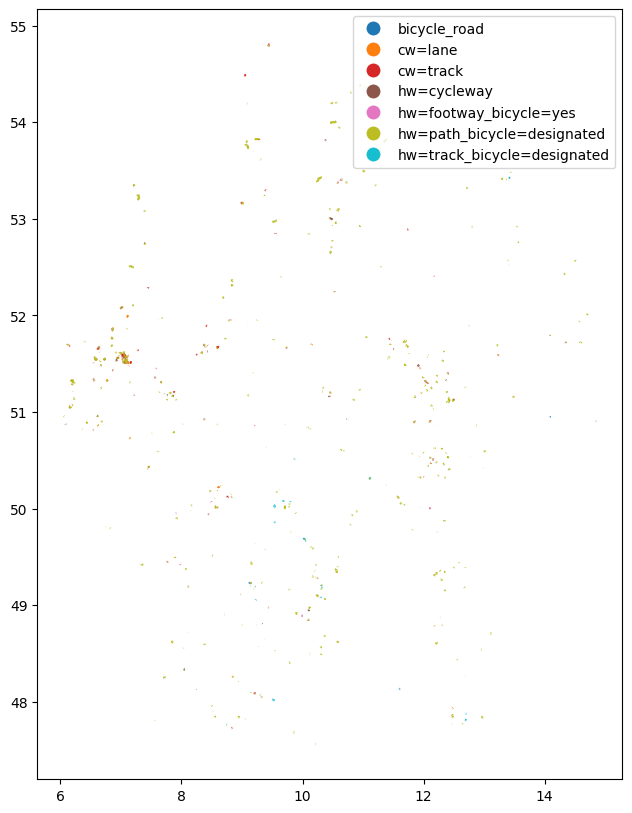

In [50]:
gdf_categories.plot(column='target', figsize=(12, 10), legend=True, cmap='tab10')

In [35]:
# Erstelle Karte mit zwei Layern: colored by target und colored by source
# Basemap: CartoDB Positron
import folium
from folium import plugins
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Berechne Zentrum und Zoom-Level basierend auf den Daten
bounds = gdf_categories.total_bounds
center_lat = (bounds[1] + bounds[3]) / 2
center_lon = (bounds[0] + bounds[2]) / 2

# Erstelle Basis-Karte mit Positron-Basemap
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=6,
    tiles='CartoDB Positron',
    attr='CartoDB Positron'
)

# Erstelle Farbzuordnungen für Target- und Source-Kategorien
target_categories = sorted(gdf_categories['target'].unique())
source_categories = sorted(gdf_categories['source'].unique())

# Verwende Tab10 Colormap für Targets (Orange-Töne)
target_colors = cm.tab10(np.linspace(0, 1, len(target_categories)))
target_color_map = {cat: mcolors.rgb2hex(color[:3]) for cat, color in zip(target_categories, target_colors)}

# Verwende Set3 Colormap für Sources (Grün-Töne)
source_colors = cm.Set3(np.linspace(0, 1, len(source_categories)))
source_color_map = {cat: mcolors.rgb2hex(color[:3]) for cat, color in zip(source_categories, source_colors)}

# Erstelle FeatureGroups für beide Layer
fg_target = folium.FeatureGroup(name='Colored by Target', show=True)
fg_source = folium.FeatureGroup(name='Colored by Source', show=False)

# Funktion zum Erstellen von Popup-HTML mit OSM-Link
def create_popup(row, column_name):
    osm_id = row.get('osm_id', 'N/A')
    category = row.get(column_name, 'N/A')
    length_km = row.get('length_km', 0)
    osm_link = f'<a href="https://www.openstreetmap.org/way/{osm_id}" target="_blank">OSM Way {osm_id}</a>'
    return f"""
    <div style="font-family: Arial, sans-serif;">
        <b>{column_name.title()}:</b> {category}<br>
        <b>Length:</b> {length_km:.3f} km<br>
        <b>OSM:</b> {osm_link}
    </div>
    """

# Füge Features zum Target-Layer hinzu
# Erstelle ein Dictionary für schnellen Zugriff auf Farben pro Geometrie
target_color_dict = {}
for idx, row in gdf_categories.iterrows():
    target_cat = row['target']
    color = target_color_map.get(target_cat, '#1f77b4')
    target_color_dict[idx] = color
    popup = folium.Popup(create_popup(row, 'target'), max_width=300)
    # Verwende eine Closure, um die Farbe korrekt zu binden
    def make_style_function(c):
        return lambda x: {
            'color': c,
            'weight': 2,
            'opacity': 0.8
        }
    folium.GeoJson(
        row.geometry.__geo_interface__,
        style_function=make_style_function(color),
        popup=popup,
        tooltip=row['target']
    ).add_to(fg_target)

# Füge Features zum Source-Layer hinzu
source_color_dict = {}
for idx, row in gdf_categories.iterrows():
    source_cat = row['source']
    color = source_color_map.get(source_cat, '#2ca02c')
    source_color_dict[idx] = color
    popup = folium.Popup(create_popup(row, 'source'), max_width=300)
    # Verwende eine Closure, um die Farbe korrekt zu binden
    def make_style_function(c):
        return lambda x: {
            'color': c,
            'weight': 2,
            'opacity': 0.8
        }
    folium.GeoJson(
        row.geometry.__geo_interface__,
        style_function=make_style_function(color),
        popup=popup,
        tooltip=row['source']
    ).add_to(fg_source)

# Füge Layer zur Karte hinzu
fg_target.add_to(m)
fg_source.add_to(m)

# Erstelle Legenden für beide Layer mit Kategorien und Farben
def create_legend_html(categories, color_map, title):
    legend_items = []
    for cat in categories:
        color = color_map.get(cat, '#000000')
        # Kürze lange Kategorienamen
        display_name = cat.replace('hw=', '').replace('bicycle=designated', 'bike').replace('bicycle=yes', 'bike').replace('_', ' ')
        if len(display_name) > 25:
            display_name = display_name[:22] + '...'
        legend_items.append(f'''
        <div style="margin: 5px 0;">
            <span style="display: inline-block; width: 20px; height: 12px; background-color: {color}; border: 1px solid #333; margin-right: 8px; vertical-align: middle;"></span>
            <span style="font-size: 11px;">{display_name}</span>
        </div>
        ''')
    
    return f'''
<div id="legend-{title.lower().replace(' ', '-')}" style="position: fixed; 
     bottom: 50px; right: 50px; width: 250px; max-height: 400px; overflow-y: auto;
     background-color: white; z-index:9999; padding: 10px;
     border: 2px solid grey; border-radius: 5px; box-shadow: 0 0 15px rgba(0,0,0,0.2);">
     <h4 style="margin-top:0; margin-bottom: 10px;">{title}</h4>
     <div style="font-size: 10px; color: #666; margin-bottom: 8px;">Click on a way to open OSM</div>
     {' '.join(legend_items)}
</div>
'''

legend_target_html = create_legend_html(target_categories, target_color_map, 'Target Categories')
legend_source_html = create_legend_html(source_categories, source_color_map, 'Source Categories')
# Füge display: none zur Source-Legende hinzu
legend_source_html = legend_source_html.replace('id="legend-source-categories" style="position: fixed;', 'id="legend-source-categories" style="position: fixed; display: none;')

# Füge Legenden hinzu
m.get_root().html.add_child(folium.Element(legend_target_html))
m.get_root().html.add_child(folium.Element(legend_source_html))

# Füge Layer-Control mit Radio-Button-Verhalten hinzu
layer_control = folium.LayerControl(collapsed=False)
layer_control.add_to(m)

# Custom JavaScript für Radio-Button-Verhalten und dynamische Legenden
custom_js = """
<script>
document.addEventListener('DOMContentLoaded', function() {
    // Warte bis Folium geladen ist
    setTimeout(function() {
        // Funktion zum Aktualisieren der Legenden und Layer
        function updateLegends(activeLayerName) {
            const legendTarget = document.getElementById('legend-target-categories');
            const legendSource = document.getElementById('legend-source-categories');
            
            console.log('Updating legends for layer:', activeLayerName);
            console.log('Target legend exists:', !!legendTarget);
            console.log('Source legend exists:', !!legendSource);
            
            // Versuche Leaflet-Layer direkt zu finden und zu steuern
            // Dies stellt sicher, dass wirklich nur ein Layer sichtbar ist
            try {
                // Finde die Leaflet-Map über verschiedene Methoden
                let map = null;
                // Methode 1: Über window._leaflet_id
                if (window._leaflet_id) {
                    const mapId = window._leaflet_id;
                    const mapElement = document.getElementById(mapId);
                    if (mapElement && mapElement._leaflet_id) {
                        map = window[mapElement._leaflet_id];
                    }
                }
                // Methode 2: Über das erste Leaflet-Map-Element
                if (!map) {
                    const mapElements = document.querySelectorAll('.leaflet-container');
                    if (mapElements.length > 0) {
                        const firstMap = mapElements[0];
                        if (firstMap._leaflet_id) {
                            map = window[firstMap._leaflet_id];
                        }
                    }
                }
                
                if (map && map.eachLayer) {
                    let targetLayer = null;
                    let sourceLayer = null;
                    
                    // Finde die beiden Layer
                    map.eachLayer(function(layer) {
                        if (layer.options && layer.options.name) {
                            const layerName = layer.options.name;
                            if (layerName === 'Colored by Target') {
                                targetLayer = layer;
                            } else if (layerName === 'Colored by Source') {
                                sourceLayer = layer;
                            }
                        }
                    });
                    
                    // Aktiviere/Deaktiviere Layer basierend auf Auswahl
                    if (activeLayerName && (activeLayerName.includes('Target') || activeLayerName.includes('target'))) {
                        if (sourceLayer && map.hasLayer(sourceLayer)) {
                            map.removeLayer(sourceLayer);
                        }
                        if (targetLayer && !map.hasLayer(targetLayer)) {
                            map.addLayer(targetLayer);
                        }
                    } else if (activeLayerName && (activeLayerName.includes('Source') || activeLayerName.includes('source'))) {
                        if (targetLayer && map.hasLayer(targetLayer)) {
                            map.removeLayer(targetLayer);
                        }
                        if (sourceLayer && !map.hasLayer(sourceLayer)) {
                            map.addLayer(sourceLayer);
                        }
                    }
                }
            } catch (e) {
                console.log('Could not directly control Leaflet layers:', e);
            }
            
            if (activeLayerName && (activeLayerName.includes('Target') || activeLayerName.includes('target'))) {
                if (legendTarget) {
                    legendTarget.style.display = 'block';
                    console.log('Showing Target legend');
                }
                if (legendSource) {
                    legendSource.style.display = 'none';
                }
            } else if (activeLayerName && (activeLayerName.includes('Source') || activeLayerName.includes('source'))) {
                if (legendTarget) {
                    legendTarget.style.display = 'none';
                }
                if (legendSource) {
                    legendSource.style.display = 'block';
                    console.log('Showing Source legend');
                }
            }
        }
        
        // Finde alle Layer-Checkboxen
        function setupLayerControls() {
            const layerControls = document.querySelectorAll('input[type="checkbox"]');
            
            layerControls.forEach(function(checkbox) {
                // Ändere Checkboxen zu Radio-Buttons (visuell)
                checkbox.type = 'radio';
                checkbox.name = 'layer-selector';
                
                // Finde den Label-Text für diesen Checkbox
                let layerName = '';
                const label = checkbox.closest('label') || checkbox.parentElement.querySelector('label');
                if (label) {
                    layerName = label.textContent.trim();
                } else {
                    // Versuche es über das nächste Text-Element
                    const nextSibling = checkbox.nextSibling;
                    if (nextSibling && nextSibling.nodeType === 3) {
                        layerName = nextSibling.textContent.trim();
                    }
                }
                
                // Entferne alte Event-Listener (falls vorhanden)
                const newCheckbox = checkbox.cloneNode(true);
                checkbox.parentNode.replaceChild(newCheckbox, checkbox);
                
                newCheckbox.addEventListener('change', function() {
                    if (this.checked) {
                        // Deaktiviere alle anderen Radio-Buttons
                        document.querySelectorAll('input[name="layer-selector"]').forEach(function(cb) {
                            if (cb !== this) {
                                cb.checked = false;
                                // Trigger change event für Folium, damit der Layer wirklich deaktiviert wird
                                const event = new Event('change', { bubbles: true });
                                cb.dispatchEvent(event);
                            }
                        }.bind(this));
                        
                        // Warte kurz, damit Folium die Layer-Änderung verarbeitet
                        setTimeout(function() {
                            // Aktualisiere Legenden basierend auf aktivem Layer
                            updateLegends(layerName);
                        }, 100);
                    }
                });
            });
            
            // Initialisiere: Finde den aktiven Layer
            const activeCheckbox = document.querySelector('input[name="layer-selector"]:checked');
            if (activeCheckbox) {
                const label = activeCheckbox.closest('label') || activeCheckbox.parentElement.querySelector('label');
                const layerName = label ? label.textContent.trim() : '';
                updateLegends(layerName);
            } else {
                // Standard: Zeige Target-Legende
                updateLegends('Colored by Target');
            }
        }
        
        // Initialisiere sofort
        setupLayerControls();
        
        // Überwache Änderungen im DOM für dynamisch hinzugefügte Layer-Controls
        const observer = new MutationObserver(function(mutations) {
            // Prüfe ob neue Layer-Controls hinzugefügt wurden
            const layerControls = document.querySelectorAll('input[type="checkbox"]');
            const radioControls = document.querySelectorAll('input[name="layer-selector"]');
            
            if (layerControls.length > radioControls.length) {
                setupLayerControls();
            }
            
            // Prüfe auch auf Änderungen an den Checkboxen
            document.querySelectorAll('input[name="layer-selector"]').forEach(function(checkbox) {
                if (checkbox.checked) {
                    const label = checkbox.closest('label') || checkbox.parentElement.querySelector('label');
                    const layerName = label ? label.textContent.trim() : '';
                    updateLegends(layerName);
                }
            });
        });
        
        // Beobachte Änderungen im Layer-Control-Bereich
        const layerControl = document.querySelector('.leaflet-control-layers');
        if (layerControl) {
            observer.observe(layerControl, { 
                childList: true, 
                subtree: true, 
                attributes: true,
                attributeFilter: ['checked']
            });
        }
        
        // Zusätzlich: Periodisch prüfen (Fallback)
        setInterval(function() {
            const checkedRadio = document.querySelector('input[name="layer-selector"]:checked');
            if (checkedRadio) {
                const label = checkedRadio.closest('label') || checkedRadio.parentElement.querySelector('label');
                const layerName = label ? label.textContent.trim() : '';
                updateLegends(layerName);
            }
        }, 500);
        
    }, 1500); // Etwas länger warten, damit Folium vollständig geladen ist
});
</script>
"""

m.get_root().html.add_child(folium.Element(custom_js))

# Speichere Karte
m.save("gdf_categories.html")
print("✅ Karte gespeichert als 'gdf_categories.html'")
print("   - Layer 1: Colored by Target (aktiv)")
print("   - Layer 2: Colored by Source")
print("   - Basemap: CartoDB Positron")
print("   - Radio-Button Layer-Wechsel")
print("   - Dynamische Legenden")
print("   - Klick auf Way → OSM-Link")

✅ Karte gespeichert als 'gdf_categories.html'
   - Layer 1: Colored by Target (aktiv)
   - Layer 2: Colored by Source
   - Basemap: CartoDB Positron
   - Radio-Button Layer-Wechsel
   - Dynamische Legenden
   - Klick auf Way → OSM-Link


In [43]:

# Alternative: Verwende explore() mit besserer Layer-Kontrolle
# Diese Version stellt sicher, dass die Farben korrekt zugeordnet werden

# Erstelle zwei separate GeoDataFrames für bessere Kontrolle
gdf_target = gdf_categories.copy()
gdf_source = gdf_categories.copy()

# Erstelle Karte mit Target-Layer (aktiv)
m2 = gdf_target.explore(
    column='target',
    name='Colored by Target',
    tiles='CartoDB Positron',
    attr='CartoDB Positron',
    style_kwds={'weight': 2, 'opacity': 0.8},
    legend=True,
    legend_kwds={'caption': 'Target Category'},
    popup=True,
    tooltip=True
)

# Füge Source-Layer hinzu (inaktiv)
gdf_source.explore(
    m=m2,
    column='source',
    name='Colored by Source',
    style_kwds={'weight': 2, 'opacity': 0.8},
    legend=True,
    legend_kwds={'caption': 'Source Category'},
    popup=True,
    tooltip=True,
    show=False  # Startet als inaktiv
)

# Füge Layer-Control hinzu
folium.LayerControl(collapsed=False).add_to(m2)

# Speichere alternative Version
m2.save("gdf_categories_v2.html")
print("✅ Alternative Karte gespeichert als 'gdf_categories_v2.html'")
print("   Diese Version verwendet explore() für bessere Layer-Kontrolle")


✅ Alternative Karte gespeichert als 'gdf_categories_v2.html'
   Diese Version verwendet explore() für bessere Layer-Kontrolle
